In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from __future__ import print_function,division
%matplotlib inline

In [3]:
%pwd

u'/Users/chaoxu/code/xuchao_ml/Analysis'

In [4]:
data = pd.read_csv("../Data/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from Pic.drawValueCountsBar import valueCountBar

remove_palette_inner
valueCountBar


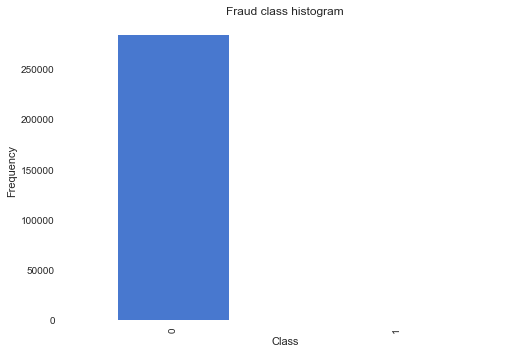

In [6]:
valueCountBar(df=data,col="Class",title="Fraud class histogram",xlabel="Class",ylabel="Frequency")

In [7]:
from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform(data['Amount'].reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

/Users/chaoxu/.pyenv/versions/anaconda2-4.3.1/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [8]:
X = data.ix[:, data.columns != 'Class']
y = data.ix[:, data.columns == 'Class']

In [9]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [10]:
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

In [11]:
normal_indices = data[data.Class == 0].index

- use SMOTE to get balance data

In [12]:
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE
def plot_resampling(ax, X, y, title):
    c0 = ax.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5,color='b')
    c1 = ax.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5,color='r')
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])
    return c0, c1

In [13]:
from imblearn.over_sampling import SMOTE
method = SMOTE(kind="svm")
X_res, y_res = method.fit_sample(X,y["Class"])

In [14]:
print(X_res)
print(y_res)
print(type(X_res))
print(type(y_res))

[[ -1.35980713e+00  -7.27811733e-02   2.53634674e+00 ...,   1.33558377e-01
   -2.10530535e-02   2.44964263e-01]
 [  1.19185711e+00   2.66150712e-01   1.66480113e-01 ...,  -8.98309914e-03
    1.47241692e-02  -3.42474541e-01]
 [ -1.35835406e+00  -1.34016307e+00   1.77320934e+00 ...,  -5.53527940e-02
   -5.97518406e-02   1.16068593e+00]
 ..., 
 [ -6.89900443e+00   4.74298489e+00  -1.07171572e+01 ...,   1.88408970e+00
   -5.80536801e-01   9.95741036e-01]
 [ -5.84885558e+00   5.22573954e+00  -6.87800922e+00 ...,   1.18500381e-02
   -3.18113902e-01  -3.53229393e-01]
 [ -2.16129596e+00   2.28383608e+00  -2.86438791e+00 ...,  -6.83105192e-01
   -1.19620266e+00   3.45146486e-01]]
[0 0 0 ..., 1 1 1]
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


In [15]:
from sklearn.cross_validation import train_test_split

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size = 0.3, random_state = 0)

/Users/chaoxu/.pyenv/versions/anaconda2-4.3.1/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number transactions train dataset:  398041
Number transactions test dataset:  170589
Total number of transactions:  568630


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,precision_score,classification_report

cross validation先将数据分成k个大小相同的互斥子集，即D=D1+D2+D3+D4+.....+Dk;每一个子集都尽量保证数据分布的一致性。然后每一次从k-1个子集的并集作为训练集，剩余的一个子集作为测试集。这样可以获得k组训练/测试集。cross validation的稳定性和保真性很大程度上取决于k的取值。常用的k值有5,19,20等。

In [27]:
def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(len(y_train_data),5,shuffle=False) 

    # Different C parameters
    c_param_range = [0.01,0.1,1,10,100]

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        precision_accs = []
        for iteration, indices in enumerate(fold,start=1):

            # Call the logistic regression model with a certain C parameter
            lr = LogisticRegression(C = c_param, penalty = 'l1')

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            lr.fit(x_train_data[indices[0],:],y_train_data[indices[0]])

            # Predict values using the test indices in the training data
            y_pred_undersample = lr.predict(x_train_data[indices[1]])

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train_data[indices[1]],y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)
            precision_acc = precision_score(y_train_data[indices[1]],y_pred_undersample)
            precision_accs.append(precision_acc)
            print('Iteration ', iteration,': precision score = ', precision_acc)
    
        # The macro value of F2
        f2 = 0.2 * (4/np.mean(recall_accs) + 1/np.mean(precision_accs))
        results_table.ix[j,'F2'] = f2
        j += 1
        print('')
        print('macro F2 ', f2)
        print('')

    best_c = results_table.loc[results_table['F2'].idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')

    return best_c

In [28]:
best_c = printing_Kfold_scores(X_train,y_train)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.984506864844
Iteration  1 : precision score =  0.989517395047
Iteration  2 : recall score =  0.983467325285
Iteration  2 : precision score =  0.990129909672
Iteration  3 : recall score =  0.984666183055
Iteration  3 : precision score =  0.989393253908
Iteration  4 : recall score =  0.984170923824
Iteration  4 : precision score =  0.99015115072
Iteration  5 : recall score =  0.983446370259
Iteration  5 : precision score =  0.990061703419

macro F2  1.0150162304

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 : recall score =  0.985791661418
Iteration  1 : precision score =  0.990156882591
Iteration  2 : recall score =  0.984626628695
Iteration  2 : precision score =  0.991146176874
Iteration  3 : recall score =  0.985966930985
Iteration  3 : precision score =  0.990152733119
I

- 混淆矩阵绘图函数

In [29]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

4947081
170589
Recall metric in the testing dataset:  0.984862498098
Precision metric in the testting dataset: 0.990101806626
f2 metric in the testting dataset: 1.01429556369


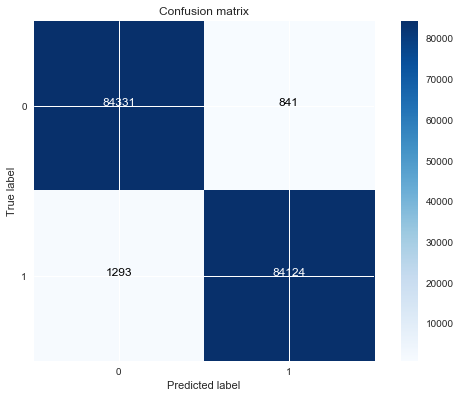

In [36]:
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print(X_test.size)
print(y_test.size)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

recall = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
precision = cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1])
f2 = 0.2*(4/recall + 1/precision)
print("Recall metric in the testing dataset: ", recall)
print("Precision metric in the testting dataset:", precision)
print("f2 metric in the testting dataset:", f2)

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [31]:
print(X_test.shape[0])
print(y_test.size)

170589
170589


这个结果比之前的已经高了很多，不过我们更加关心的是，这个模型在原始数据上的结果是否也比之前的有所提升。

In [32]:
# original dataset
X_original_train, X_original_test, y_original_train, y_original_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [57]:
print(X_original_test)

              V1        V2        V3        V4        V5        V6        V7  \
183484 -0.323334  1.057455 -0.048341 -0.607204  1.259821 -0.091761  1.159101   
255448 -0.349718  0.932619  0.142992 -0.657071  1.169784 -0.733369  1.009985   
244749 -1.614711 -2.406570  0.326194  0.665520  2.369268 -1.775367 -1.139049   
63919  -2.477184  0.860613  1.441850  1.051019 -1.856621  2.078384  0.510828   
11475   1.338831 -0.547264  0.737389 -0.212383 -1.110039 -0.525744 -0.801403   
134016  0.039885  2.170693 -2.012595  1.653119  0.615994 -1.770922  0.704471   
204962 -0.415555  1.625917  1.622797  4.506173 -0.374560  0.901055 -0.405768   
60121   1.449410 -0.468795  0.341725 -0.791574 -0.893115 -0.749088 -0.592331   
167362  1.971810 -1.200239 -2.830201 -1.670140  1.732721  3.287608 -1.111164   
112790 -1.367879 -0.238217  1.871754  3.050801 -1.438600  2.489319  1.154520   
202391  0.818750 -3.726599 -3.618824 -1.144657 -0.852683 -0.697506  0.883226   
209695 -0.820062  1.547537 -1.411930 -0.

Recall metric in the testing dataset:  0.863945578231
Precision metric in the testting dataset: 0.133263378804
f2 metric in the testting dataset: 2.42677165354


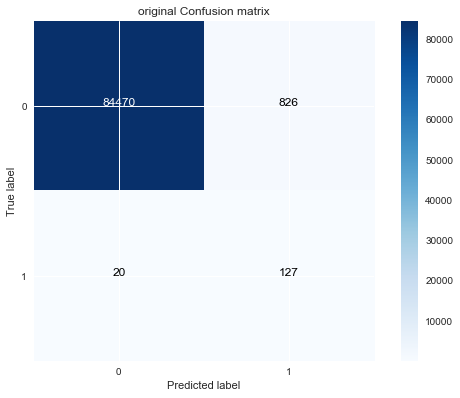

In [127]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train,y_train)
y_original_pred = lr.predict(X_original_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_original_test,y_original_pred)
np.set_printoptions(precision=2)

recall = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
precision = cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1])
f2 = 0.2*(4/recall + 1/precision)
print("Recall metric in the testing dataset: ", recall)
print("Precision metric in the testting dataset:", precision)
print("f2 metric in the testting dataset:", f2)
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='original Confusion matrix')
plt.show()

使用border line1产生欺诈数据

In [17]:
method = SMOTE(kind="borderline1")
X_border, y_border = method.fit_sample(X,y["Class"])

In [18]:
X_border_train, X_border_test, y_border_train, y_border_test = train_test_split(X_border,y_border,test_size = 0.3, random_state = 0)

In [19]:
print("Number transactions border train dataset: ", X_train.shape[0])
print("Number transactions border test dataset: ", X_test.shape[0])
print("Total number of transactions: ", X_train.shape[0]+ X_test.shape[0])

Number transactions border train dataset:  398041
Number transactions border test dataset:  170589
Total number of transactions:  568630


In [34]:
best_c_border = printing_Kfold_scores(X_border_train,y_border_train)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.981987655876
Iteration  1 : precision score =  0.987385379199
Iteration  2 : recall score =  0.984097381486
Iteration  2 : precision score =  0.98803167936
Iteration  3 : recall score =  0.982289816645
Iteration  3 : precision score =  0.98695586609
Iteration  4 : recall score =  0.982484837809
Iteration  4 : precision score =  0.987529721253
Iteration  5 : recall score =  0.982667671439
Iteration  5 : precision score =  0.987579521357

macro F2  1.01661149055

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 : recall score =  0.983423604988
Iteration  1 : precision score =  0.988503709706
Iteration  2 : recall score =  0.985382696136
Iteration  2 : precision score =  0.989347165992
Iteration  3 : recall score =  0.983790679641
Iteration  3 : precision score =  0.988066525977
I

4947081
170589
Recall metric in the testing dataset:  0.983925916387
Precision metric in the testting dataset: 0.98754465125
f2 metric in the testting dataset: 1.01559183285


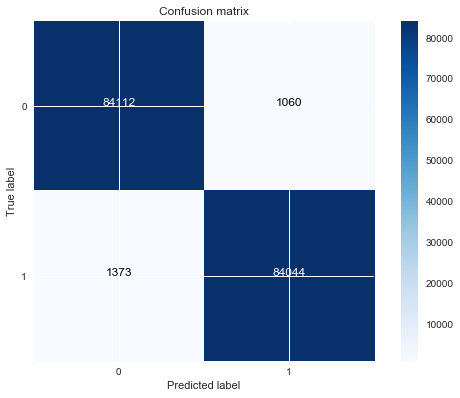

In [38]:
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_border_train,y_border_train)
y_border_pred = lr.predict(X_border_test)

print(X_border_test.size)
print(y_border_test.size)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_border_test,y_border_pred)
np.set_printoptions(precision=2)

recall = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
precision = cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1])
f2 = 0.2*(4/recall + 1/precision)
print("Recall metric in the testing dataset: ", recall)
print("Precision metric in the testting dataset:", precision)
print("f2 metric in the testting dataset:", f2)

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

使用原始数据

Recall metric in the testing dataset:  0.877551020408
Precision metric in the testting dataset: 0.114463176575
f2 metric in the testting dataset: 2.65891472868


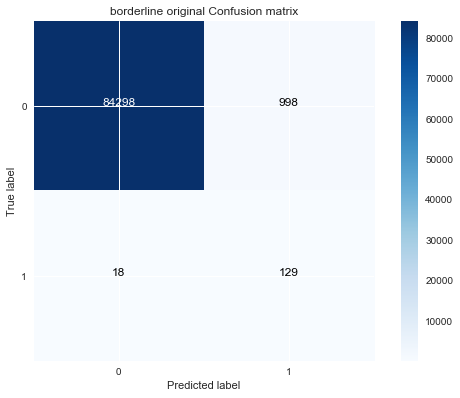

In [128]:
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_border_train,y_border_train)
y_original_border_pred = lr.predict(X_original_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_original_test,y_original_border_pred)
np.set_printoptions(precision=2)

recall = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
precision = cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1])
f2 = 0.2*(4/recall + 1/precision)
print("Recall metric in the testing dataset: ", recall)
print("Precision metric in the testting dataset:", precision)
print("f2 metric in the testting dataset:", f2)
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='borderline original Confusion matrix')
plt.show()

In [66]:
print(y_original_border_pred)
print(y_original_pred)
y_original_tmp = y_original_test.iloc[:,0].values[:]
print(y_original_tmp)

[0 0 0 ..., 0 0 0]
[0 0 0 ..., 0 0 0]
[0 0 0 ..., 0 0 0]


In [136]:
total_tmp = np.array([y_original_border_pred,y_original_pred,y_original_tmp])
print(total_tmp)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [137]:
e00 = np.where((total_tmp[0] == total_tmp[2]) & (total_tmp[1] == total_tmp[2]))[0].size / y_original_tmp.size
e10 = np.where((total_tmp[0] == total_tmp[2]) & (total_tmp[1] != total_tmp[2]))[0].size / y_original_tmp.size
e01 = np.where((total_tmp[0] != total_tmp[2]) & (total_tmp[1] == total_tmp[2]))[0].size / y_original_tmp.size
e11 = np.where((total_tmp[0] != total_tmp[2]) & (total_tmp[1] != total_tmp[2]))[0].size / y_original_tmp.size
print(e00)
print(e10)
print(e01)
print(e11)
t = np.square(np.abs(e01-e10)-1) / (e00+e10)
print(t)

0.988073920625
3.51111267161e-05
0.00202474164063
0.00986622660721
1.00801092349


In [116]:
e_border = np.where((total_tmp[0] != total_tmp[2]))[0].size / y_original_tmp.size
print(e_border)

0.0118909682478


In [117]:
e_svm = np.where((total_tmp[1] != total_tmp[2]))[0].size / y_original_tmp.size
print(e_border)

0.0118909682478


下采样

In [118]:
# Number of data points in the minority class
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

# Picking the indices of the normal classes
normal_indices = data[data.Class == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.ix[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.ix[:, under_sample_data.columns == 'Class']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


In [123]:
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))
print(X_train_undersample.values)


Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions:  984
[[-1.86  3.44 -4.47 ...,  0.42  0.21 -0.35]
 [ 2.04  0.29 -1.57 ..., -0.01 -0.06 -0.35]
 [ 0.23  1.01 -2.27 ..., -0.18 -0.06 -0.18]
 ..., 
 [-0.21 -0.28  0.82 ...,  0.04  0.23 -0.08]
 [-1.81 -0.63  2.68 ..., -0.88 -0.67  0.21]
 [-2.34  2.45 -1.76 ..., -0.54 -0.13 -0.35]]


In [124]:
best_c = printing_Kfold_scores(X_train_undersample.values,y_train_undersample.values)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.972602739726
Iteration  1 : precision score =  0.78021978022
Iteration  2 : recall score =  0.917808219178
Iteration  2 : precision score =  0.712765957447
Iteration  3 : recall score =  1.0
Iteration  3 : precision score =  0.634408602151
Iteration  4 : recall score =  0.972972972973
Iteration  4 : precision score =  0.734693877551
Iteration  5 : recall score =  0.984848484848
Iteration  5 : precision score =  0.691489361702

macro F2  1.1064495032

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 : recall score =  0.849315068493
Iteration  1 : precision score =  0.953846153846
Iteration  2 : recall score =  0.86301369863
Iteration  2 : precision score =  0.969230769231
Iteration  3 : recall score =  0.949152542373
Iteration  3 : precision score =  0.965517241379
Iteration  4 

/Users/chaoxu/.pyenv/versions/anaconda2-4.3.1/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.91935483871
Iteration  4 : recall score =  0.945945945946
Iteration  4 : precision score =  1.0
Iteration  5 : recall score =  0.924242424242
Iteration  5 : precision score =  0.953125

macro F2  1.07797822988

-------------------------------------------
C parameter:  100
-------------------------------------------

Iteration  1 : recall score =  0.86301369863
Iteration  1 : precision score =  0.954545454545
Iteration  2 : recall score =  0.890410958904
Iteration  2 : precision score =  0.970149253731
Iteration  3 : recall score =  0.966101694915
Iteration  3 : precision score =  0.91935483871
Iteration  4 : recall score =  0.945945945946
Iteration  4 : precision score =  1.0
Iteration  5 : recall score =  0.924242424242
Iteration  5 : precision score =  0.938461538462

macro F2  1.08060903786

*********************************************************************************
Best model to choose from cross validation is with C parameter =  0.01
***************************************

Recall metric in the testing dataset:  0.931972789116
Precision metric in the testting dataset: 0.901315789474
f2 metric in the testting dataset: 1.0802919708


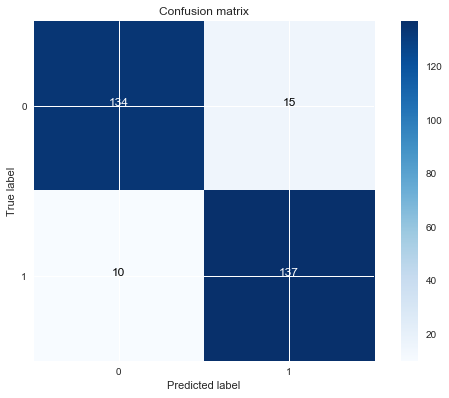

In [126]:
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)
recall = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
precision = cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1])
f2 = 0.2*(4/recall + 1/precision)
print("Recall metric in the testing dataset: ", recall)
print("Precision metric in the testting dataset:", precision)
print("f2 metric in the testting dataset:", f2)
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Recall metric in the testing dataset:  0.931972789116
Precision metric in the testting dataset: 0.0156107566089
f2 metric in the testting dataset: 13.6700729927


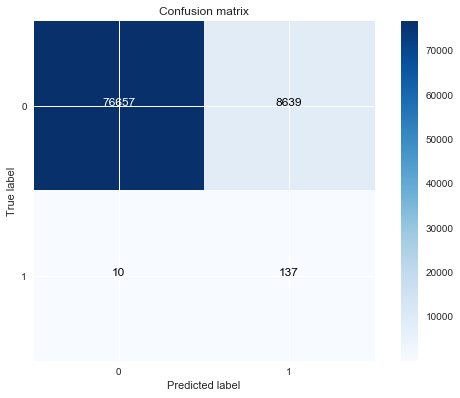

In [131]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_under_sample_pred = lr.predict(X_original_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_original_test,y_under_sample_pred)
np.set_printoptions(precision=2)
recall = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
precision = cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1])
f2 = 0.2*(4/recall + 1/precision)
print("Recall metric in the testing dataset: ", recall)
print("Precision metric in the testting dataset:", precision)
print("f2 metric in the testting dataset:", f2)
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [132]:
total_tmp = np.array([y_original_border_pred,y_under_sample_pred,y_original_tmp])
print(total_tmp)

[[0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 1]
 [0 0 0 ..., 0 0 0]]


In [134]:
e00 = np.where((total_tmp[0] == total_tmp[2]) & (total_tmp[1] == total_tmp[2]))[0].size / y_original_tmp.size
e10 = np.where((total_tmp[0] == total_tmp[2]) & (total_tmp[1] != total_tmp[2]))[0].size / y_original_tmp.size
e01 = np.where((total_tmp[0] != total_tmp[2]) & (total_tmp[1] == total_tmp[2]))[0].size / y_original_tmp.size
e11 = np.where((total_tmp[0] != total_tmp[2]) & (total_tmp[1] != total_tmp[2]))[0].size / y_original_tmp.size
print(e00)
print(e10)
print(e01)
print(e11)
t = np.square(np.abs(e01-e10)-1) / (e00+e10)
print(t)

0.898329880739
0.089779151013
0.000444740938403
0.0114462273094
0.839291808925


4947081
170589
Recall metric in the testing dataset:  0.994357095192
Precision metric in the testting dataset: 0.994624915099
f2 metric in the testting dataset: 1.00562076882


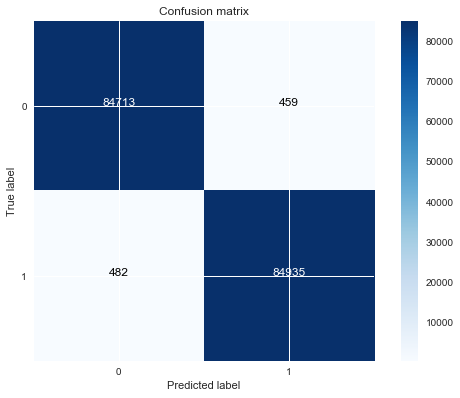

In [139]:
from sklearn.ensemble import RandomForestClassifier
params = {'max_features':'auto', 'max_depth': 6, 'min_samples_split': 2, \
            'oob_score':True}
params['n_estimators'] = 50
params['n_jobs'] = 50
forest = RandomForestClassifier(**params)
forest.fit(X_border_train,y_border_train)
y_border_rf_pred = forest.predict(X_border_test)

print(X_border_test.size)
print(y_border_test.size)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_border_test,y_border_rf_pred)
np.set_printoptions(precision=2)
recall = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
precision = cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1])
f2 = 0.2*(4/recall + 1/precision)
print("Recall metric in the testing dataset: ", recall)
print("Precision metric in the testting dataset:", precision)
print("f2 metric in the testting dataset:", f2)
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

4947081
170589
Recall metric in the testing dataset:  0.87074829932
Precision metric in the testting dataset: 0.246153846154
f2 metric in the testting dataset: 1.73125


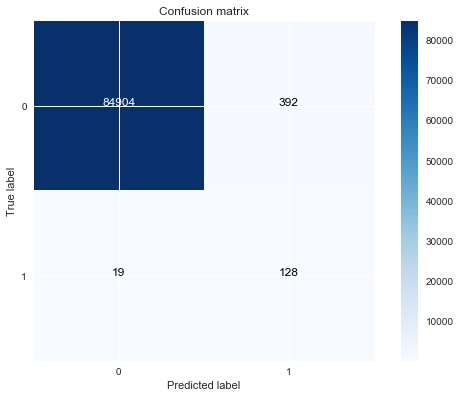

In [140]:
forest = RandomForestClassifier(**params)
forest.fit(X_border_train,y_border_train)
y_border_rf_original_pred = forest.predict(X_original_test)

print(X_border_test.size)
print(y_border_test.size)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_original_test,y_border_rf_original_pred)
np.set_printoptions(precision=2)
recall = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
precision = cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1])
f2 = 0.2*(4/recall + 1/precision)
print("Recall metric in the testing dataset: ", recall)
print("Precision metric in the testting dataset:", precision)
print("f2 metric in the testting dataset:", f2)
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                    , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [162]:
from Pic.maxent_style import *
@maxent_style
def best_num_classifiers(rf_labels,rf_erros,palette=None):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for index,rf_errors in enumerate(rf_erros):
        ax.plot(range(1,Max_Classfiers),rf_errors,linestyle='-',color=next(palette),label=rf_labels[index])
        
    ax.set_ylim((0.0, 0.4))
    ax.set_xlabel('n_estimators')
    ax.set_ylabel('error rate')
    leg = ax.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.7)
    plt.show()

/Users/chaoxu/.pyenv/versions/anaconda2-4.3.1/lib/python2.7/site-packages/ipykernel/__main__.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


best_num_classifiers


NameError: global name 'rf_errors' is not defined

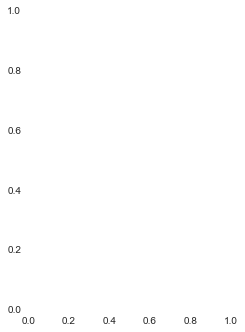

In [151]:
Max_Classfiers = 100
rf_border_errors = []
rf_originalr_errors = []
for x in range(1,Max_Classfiers):
    params['n_estimators'] = x
    params['n_jobs'] = x
    forest = RandomForestClassifier(**params)
    forest.fit(X_border_train,y_border_train)
    rf_border_error = 1.0 - forest.oob_score_
    rf_border_errors.append(rf_border_error)
    
for x in range(1,Max_Classfiers):
    params['n_estimators'] = x
    params['n_jobs'] = x
    forest = RandomForestClassifier(**params)
    forest.fit(X_original_test,y_original_test)
    rf_original_error = 1.0 - forest.oob_score_
    rf_originalr_errors.append(rf_original_error)
    
rf_erros = [rf_border_errors,rf_originalr_errors]
rf_erros_labels = ["border-line","original"]


best_num_classifiers


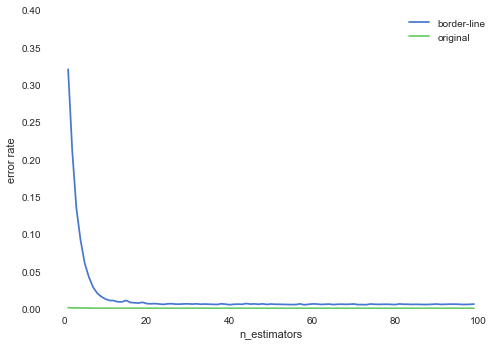

In [163]:
best_num_classifiers(rf_erros_labels,rf_erros)